In [1]:
#Uncomment as needed - if import error occurs 
#!pip install lifelines
#!pip install seaborn
#!pip install numpy
#!pip install pandas
#!pip install matplotlib

# Importing the libraries

In [2]:
#Data Processing
import numpy as np
import pandas as pd

#Data Analysis and Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.plotting import plot_lifetimes

#Data Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Data Split
from sklearn.model_selection import train_test_split

#Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

#Evaluation and Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load the Dataset

In [3]:
df = pd.read_csv('Breast Cancer.csv', low_memory = False)

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Age recode with <1 year olds,Sex,Year of diagnosis,Site recode ICD-O-3/WHO 2008,Behavior code ICD-O-3,Primary Site - labeled,Histologic Type ICD-O-3,Grade Clinical (2018+),Grade Pathological (2018+),Diagnostic Confirmation,ICD-O-3 Hist/behav,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Site recode - rare tumors,Combined Summary Stage (2004+),Derived EOD 2018 T (2018+),RX Summ--Surg Prim Site (1998+),RX Summ--Scope Reg LN Sur (2003+),RX Summ--Surg Oth Reg/Dis (2003+),RX Summ--Surg/Rad Seq,Reason no cancer-directed surgery,Radiation recode,"Chemotherapy recode (yes, no/unk)",Scope of reg lymph nd surg (1998-2002),RX Summ--Reg LN Examined (1998-2002),Surgery of oth reg/dis sites (1998-2002),Site specific surgery (1973-1997 varying detail by year and site),Months from diagnosis to treatment,COD to site recode,SEER cause-specific death classification,SEER other cause of death classification,Survival months,Total number of in situ/malignant tumors for patient,"Race recode (White, Black, Other)",Race/ethnicity
0,75-79 years,Female,2003,Breast,Malignant,C50.6-Axillary tail of breast,8520,Blank(s),Blank(s),Positive histology,"8520/3: Lobular carcinoma, NOS","8520/3: Lobular carcinoma, NOS",8500-8549: ductal and lobular neoplasms,19.2 Invasive lobular carcinoma of breast,Blank(s),Blank(s),22,Unknown or not applicable,None; diagnosed at autopsy,No radiation and/or cancer-directed surgery,Surgery performed,None/Unknown,No/Unknown,Blank(s),Blank(s),Blank(s),Blank(s),000,Breast,Dead (attributable to this cancer dx),Alive or dead due to cancer,0014,03,White,White
1,70-74 years,Female,2018,Breast,Malignant,C50.8-Overlapping lesion of breast,8500,9,3,Positive histology,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,19.1 Inv carcinoma of no special type-NST (obs...,Localized,T2,22,Unknown or not applicable,None; diagnosed at autopsy,Radiation after surgery,Surgery performed,Beam radiation,Yes,Blank(s),Blank(s),Blank(s),Blank(s),001,Alive,Alive or dead of other cause,Alive or dead due to cancer,0022,02,White,White
2,60-64 years,Female,2005,Breast,Malignant,C50.1-Central portion of breast,8520,Blank(s),Blank(s),Positive histology,"8520/3: Lobular carcinoma, NOS","8520/3: Lobular carcinoma, NOS",8500-8549: ductal and lobular neoplasms,19.2 Invasive lobular carcinoma of breast,Regional,Blank(s),41,Unknown or not applicable,None; diagnosed at autopsy,No radiation and/or cancer-directed surgery,Surgery performed,None/Unknown,No/Unknown,Blank(s),Blank(s),Blank(s),Blank(s),000,Breast,Dead (attributable to this cancer dx),Alive or dead due to cancer,0081,02,White,White
3,70-74 years,Female,2005,Breast,Malignant,"C50.9-Breast, NOS",8500,Blank(s),Blank(s),Positive histology,"8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS",8500-8549: ductal and lobular neoplasms,19.1 Inv carcinoma of no special type-NST (obs...,Regional,Blank(s),41,Unknown or not applicable,None; diagnosed at autopsy,No radiation and/or cancer-directed surgery,Surgery performed,None/Unknown,No/Unknown,Blank(s),Blank(s),Blank(s),Blank(s),002,Alzheimers (ICD-9 and 10 only),Alive or dead of other cause,Dead (attributable to causes other than this c...,0007,02,White,White
4,40-44 years,Female,2001,Breast,Malignant,C50.4-Upper-outer quadrant of breast,8513,Blank(s),Blank(s),Positive histology,8513/3: Atypical medullary carcinoma,8513/3: Atypical medullary carcinoma,8500-8549: ductal and lobular neoplasms,19.4 Special types of adenocarcinoma of breast,Blank(s),Blank(s),23,Blank(s),Blank(s),Radiation after surgery,Surgery performed,Beam radiation,Yes,9,07,0,Blank(s),000,Alive,Alive or dead of other cause,Alive or dead due to cancer,0224,02,White,White


# Drop unncessary columns

In [5]:
to_drop = ['Site recode ICD-O-3/WHO 2008', 'Histologic Type ICD-O-3', 'SEER cause-specific death classification','SEER other cause of death classification', 'ICD-O-3 Hist/behav','ICD-O-3 Hist/behav, malignant', 'Site recode - rare tumors', 'RX Summ--Surg Prim Site (1998+)', 'RX Summ--Scope Reg LN Sur (2003+)',
       'RX Summ--Surg Oth Reg/Dis (2003+)', 'RX Summ--Surg/Rad Seq','RX Summ--Reg LN Examined (1998-2002)','Race/ethnicity', 'Scope of reg lymph nd surg (1998-2002)', 'Surgery of oth reg/dis sites (1998-2002)',  'Site specific surgery (1973-1997 varying detail by year and site)', 'Behavior code ICD-O-3']

In [6]:
df.drop(columns = to_drop, inplace=True)

# Rename Columns

In [7]:
column_names = ['Age', 'Sex', 'Year',
       'Site',
       'Clinical Grade', 'Pathological Grade',
       'Diagnostic Confirmation', 'Histology',
       'Stage', 'EOD',
       'Surgery', 'Radiation',
       'Chemotherapy',
       'Months Taken', 'COD',
       'Survival months',
       'Number of Tumors',
       'Race']

In [8]:
for old, new in zip(df.columns, column_names):
    print('\''+old+'\'', ":", '\''+new+'\'')

'Age recode with <1 year olds' : 'Age'
'Sex' : 'Sex'
'Year of diagnosis' : 'Year'
'Primary Site - labeled' : 'Site'
'Grade Clinical (2018+)' : 'Clinical Grade'
'Grade Pathological (2018+)' : 'Pathological Grade'
'Diagnostic Confirmation' : 'Diagnostic Confirmation'
'Histology recode - broad groupings' : 'Histology'
'Combined Summary Stage (2004+)' : 'Stage'
'Derived EOD 2018 T (2018+)' : 'EOD'
'Reason no cancer-directed surgery' : 'Surgery'
'Radiation recode' : 'Radiation'
'Chemotherapy recode (yes, no/unk)' : 'Chemotherapy'
'Months from diagnosis to treatment' : 'Months Taken'
'COD to site recode' : 'COD'
'Survival months' : 'Survival months'
'Total number of in situ/malignant tumors for patient' : 'Number of Tumors'
'Race recode (White, Black, Other)' : 'Race'


In [9]:
df.columns = column_names

In [10]:
df.head()

,Age,Sex,Year,Site,Clinical Grade,Pathological Grade,Diagnostic Confirmation,Histology,Stage,EOD,Surgery,Radiation,Chemotherapy,Months Taken,COD,Survival months,Number of Tumors,Race
0,75-79 years,Female,2003,C50.6-Axillary tail of breast,Blank(s),Blank(s),Positive histology,8500-8549: ductal and lobular neoplasms,Blank(s),Blank(s),Surgery performed,None/Unknown,No/Unknown,000,Breast,0014,03,White
1,70-74 years,Female,2018,C50.8-Overlapping lesion of breast,9,3,Positive histology,8500-8549: ductal and lobular neoplasms,Localized,T2,Surgery performed,Beam radiation,Yes,001,Alive,0022,02,White
2,60-64 years,Female,2005,C50.1-Central portion of breast,Blank(s),Blank(s),Positive histology,8500-8549: ductal and lobular neoplasms,Regional,Blank(s),Surgery performed,None/Unknown,No/Unknown,000,Breast,0081,02,White
3,70-74 years,Female,2005,"C50.9-Breast, NOS",Blank(s),Blank(s),Positive histology,8500-8549: ductal and lobular neoplasms,Regional,Blank(s),Surgery performed,None/Unknown,No/Unknown,002,Alzheimers (ICD-9 and 10 only),0007,02,White
4,40-44 years,Female,2001,C50.4-Upper-outer quadrant of breast,Blank(s),Blank(s),Positive histology,8500-8549: ductal and lobular neoplasms,Blank(s),Blank(s),Surgery performed,Beam radiation,Yes,000,Alive,0224,02,White


# Cleaning the data

In [11]:
df['Age'] = df['Age'].str.replace(r'[^0-9\-]+', '')

/var/folders/cg/72s387yj2x74yjnrdj3cwd980000gn/T/ipykernel_811/1267015328.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Age'] = df['Age'].str.replace(r'[^0-9\-]+', '')


In [12]:
df['Site'] = df['Site'].str.slice(start=6)

In [13]:
df['Histology'] = df['Histology'].str.slice(start=10)

In [14]:
df['Clinical Grade'] = df['Clinical Grade'].str.replace('Blank(s)', '9', regex=False)

In [15]:
df['Pathological Grade'] = df['Pathological Grade'].str.replace('Blank(s)', '9', regex=False)

In [16]:
df['Stage'] = df['Stage'].str.replace('Blank(s)', 'Unstaged', regex=False)

In [17]:
df['EOD'] = df['EOD'].str.replace('Blank(s)', '88', regex=False)

In [18]:
df['Months Taken'] = df['Months Taken'].str.replace('Blank(s)', '-1', regex=False)

In [19]:
df['Months Taken'] = df['Months Taken'].astype(int)

In [20]:
df[(df['Survival months']=='Unknown') & (df['Months Taken'] != -1)]

,Age,Sex,Year,Site,Clinical Grade,Pathological Grade,Diagnostic Confirmation,Histology,Stage,EOD,Surgery,Radiation,Chemotherapy,Months Taken,COD,Survival months,Number of Tumors,Race


In [21]:
df['Survival months'] = df['Survival months'].str.replace('Unknown', '-1', regex=False)

In [22]:
df[(df['Number of Tumors']=='Unknown') & (df['Months Taken'] != -1)].head()

,Age,Sex,Year,Site,Clinical Grade,Pathological Grade,Diagnostic Confirmation,Histology,Stage,EOD,Surgery,Radiation,Chemotherapy,Months Taken,COD,Survival months,Number of Tumors,Race
114319,45-49,Female,2014,"Breast, NOS",9,9,Positive histology,ductal and lobular neoplasms,Localized,88,Surgery performed,None/Unknown,No/Unknown,0,Alive,0050,Unknown,White
128167,40-44,Female,2019,"Breast, NOS",9,9,Positive histology,ductal and lobular neoplasms,Localized,T1c,Surgery performed,None/Unknown,No/Unknown,0,Alive,0005,Unknown,White
128826,50-54,Female,2019,Lower-outer quadrant of breast,3,3,Positive histology,ductal and lobular neoplasms,Localized,T2,Surgery performed,Beam radiation,Yes,0,Alive,0002,Unknown,White
695381,40-44,Female,2011,Overlapping lesion of breast,9,9,Positive histology,"cystic, mucinous and serous neoplasms",Localized,88,Surgery performed,Beam radiation,No/Unknown,0,Alive,0098,Unknown,White
697522,65-69,Female,2012,Upper-outer quadrant of breast,9,9,Positive histology,ductal and lobular neoplasms,Localized,88,Surgery performed,None/Unknown,No/Unknown,2,Alive,0043,Unknown,White


In [23]:
df['Survival months'] = df['Survival months'].astype(int)

In [24]:
df['Number of Tumors'] = df['Number of Tumors'].str.replace('Unknown', '-1', regex=False)

In [25]:
df['Race'] = df['Race'].str.replace('Unknown', 'Other (American Indian/AK Native, Asian/Pacific Islander)', regex=False)

In [26]:
df['Number of Tumors'] = df['Number of Tumors'].astype(int)

# Exploratory Data Analysis

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154395 entries, 0 to 1154394
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   Age                      1154395 non-null  object
 1   Sex                      1154395 non-null  object
 2   Year                     1154395 non-null  int64 
 3   Site                     1154395 non-null  object
 4   Clinical Grade           1154395 non-null  object
 5   Pathological Grade       1154395 non-null  object
 6   Diagnostic Confirmation  1154395 non-null  object
 7   Histology                1154395 non-null  object
 8   Stage                    1154395 non-null  object
 9   EOD                      1154395 non-null  object
 10  Surgery                  1154395 non-null  object
 11  Radiation                1154395 non-null  object
 12  Chemotherapy             1154395 non-null  object
 13  Months Taken             1154395 non-null  int64 
 14  CO

In [28]:
df.nunique()

Age                         18
Sex                          2
Year                        20
Site                         9
Clinical Grade              11
Pathological Grade          11
Diagnostic Confirmation      9
Histology                   31
Stage                        5
EOD                         18
Surgery                      8
Radiation                    8
Chemotherapy                 2
Months Taken                26
COD                         92
Survival months            241
Number of Tumors            18
Race                         3
dtype: int64

<Figure size 640x480 with 0 Axes>

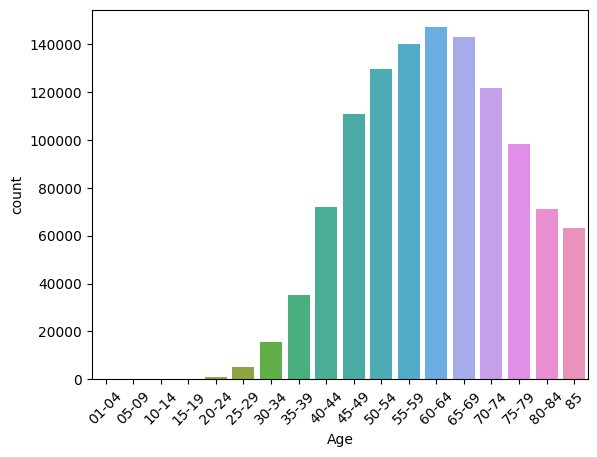

<Figure size 640x480 with 0 Axes>

In [29]:
df_sorted_age = df.sort_values(by='Age')
sns.countplot(x='Age', data=df_sorted_age)
plt.xticks(rotation=45)
plt.figure()

<Figure size 640x480 with 0 Axes>

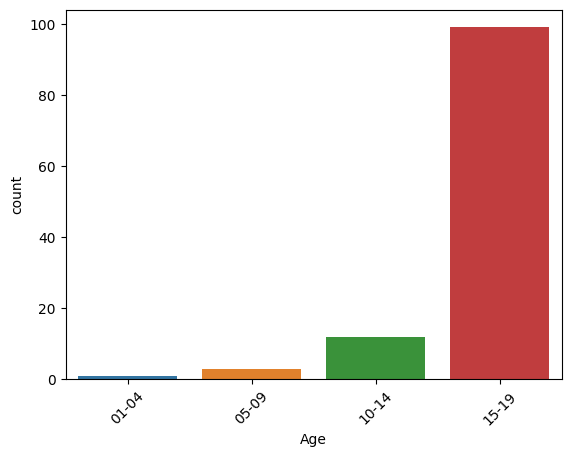

<Figure size 640x480 with 0 Axes>

In [30]:
df_age_low = df[df['Age'].isin(['01-04', '05-09', '10-14', '15-19'])].sort_values(by='Age')
sns.countplot(x='Age', data=df_age_low)
plt.xticks(rotation=45)
plt.figure()

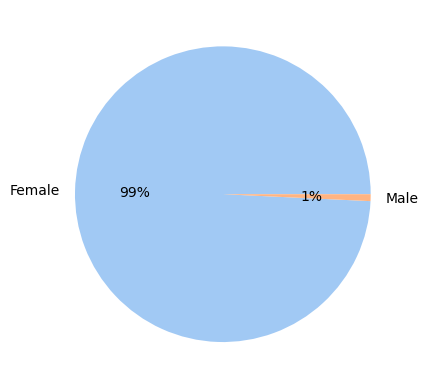

In [31]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Sex'].value_counts(), labels = df['Sex'].unique(), colors = colors, autopct='%.0f%%')
plt.show()

In [32]:
df['Sex'].value_counts()

Female    1145765
Male         8630
Name: Sex, dtype: int64

In [33]:
df_sorted_age['Alive'] = ['Alive' if i=='Alive' else 'Dead' for i in df['COD']]

<Figure size 640x480 with 0 Axes>

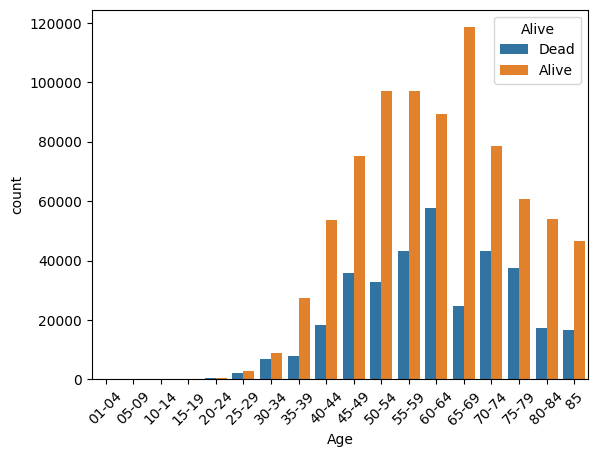

<Figure size 640x480 with 0 Axes>

In [34]:
sns.countplot(data=df_sorted_age, x='Age', hue='Alive')
plt.xticks(rotation=45)
plt.figure()

In [35]:
df['Alive'] = np.where(df['COD'] == 'Alive', 'Alive', np.where(df['COD'] == 'Breast', 'Dead', 'Dead-Other Causes'))

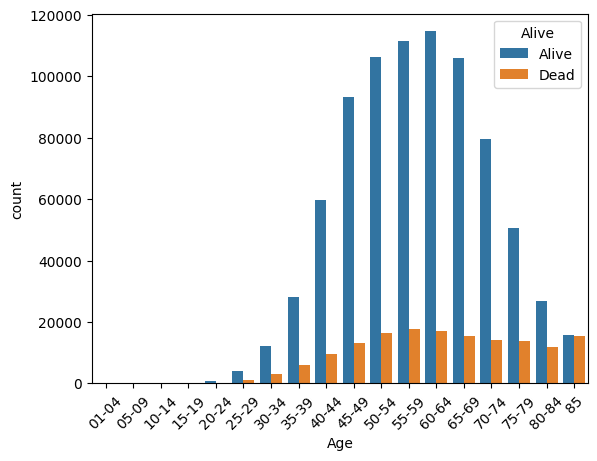

In [36]:
# Filter the DataFrame to include only 'Dead' and 'Alive' cases
df_filtered = df[df['Alive'].isin(['Dead', 'Alive'])].sort_values(by='Age')

# Create the countplot with the filtered DataFrame
sns.countplot(data=df_filtered, x='Age', hue='Alive')

# Set the rotation of x-axis labels to 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

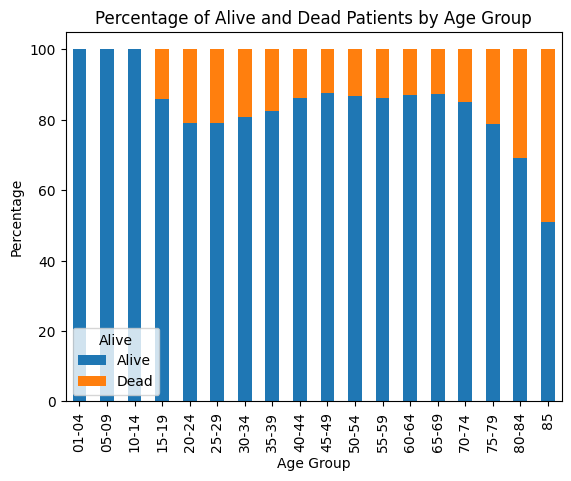

In [37]:
# Filter the DataFrame to include only 'Dead' and 'Alive' cases
df_filtered = df[df['Alive'].isin(['Dead', 'Alive'])]

# Calculate the percentage of dead and alive patients by age group
df_percent = df_filtered.groupby(['Age', 'Alive'])['Alive'].count().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name='Percentage')

# Pivot the DataFrame to have 'Dead' and 'Alive' as columns
df_pivot = df_percent.pivot(index='Age', columns='Alive', values='Percentage')

# Create the stacked bar plot
ax = df_pivot.plot(kind='bar', stacked=True)

# Set the title and axes labels
ax.set_title('Percentage of Alive and Dead Patients by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage')

# Show the plot
plt.show()


In [38]:
df_pivot

Alive,Alive,Dead
Age,,
01-04,100.000000,NaN
05-09,100.000000,NaN
10-14,100.000000,NaN
15-19,86.021505,13.978495
20-24,79.236277,20.763723
25-29,79.099099,20.900901
30-34,80.757098,19.242902
35-39,82.430450,17.569550
40-44,86.139697,13.860303


In [39]:
# create a dictionary of old and new values for pathological grade
replace_dict = {'1': 'G1', '2': 'G2', '3': 'G3', 'L': 'NG1', 'M': 'NG2', 'H': 'NG3', 'A': 'Well Differentiated', 'B': 'Mod. Differentiated', 'C': 'Poorly Differentiated', 'D': 'Undifferentiated', '9': 'Unknown'}

# replace the column values using the replace() method
df['Pathological Grade'] = df['Pathological Grade'].replace(replace_dict)
df['Clinical Grade'] = df['Clinical Grade'].replace(replace_dict)

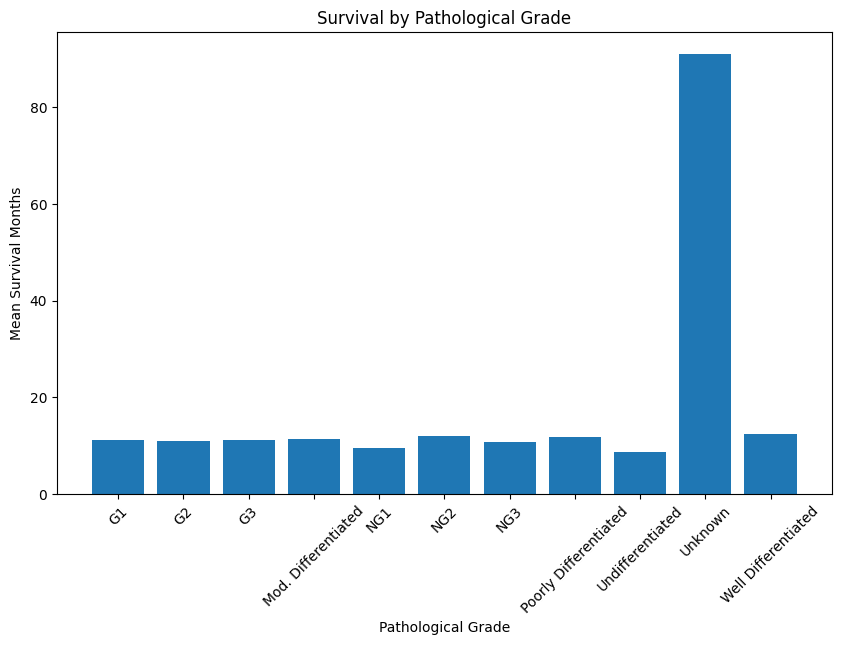

Median Survival Time for Early-Stage Breast Cancer Patients: 11.0 months
Median Survival Time for Late-Stage Breast Cancer Patients: 10.0 months


In [40]:
#create a new dataframe containing only the relevant columns
relevant_df = df[['Alive', 'Pathological Grade', 'Survival months']]

# group the data by pathological grade and calculate the mean survival time for each group
grouped_df = relevant_df.groupby(['Pathological Grade']).mean()

# create a bar chart to compare the mean survival time for each pathological grade group
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(grouped_df.index, grouped_df['Survival months'])
ax.set_xlabel('Pathological Grade')
ax.set_ylabel('Mean Survival Months')
ax.set_title('Survival by Pathological Grade')
plt.xticks(rotation=45)
plt.show()

# calculate the median survival time for patients with early-stage (grades 1-2) and late-stage (grades 3-4) breast cancer
early_stage_median = relevant_df.loc[relevant_df['Pathological Grade'].isin(['G1', 'G2', 'G3', 'Well', 'Mod'])]['Survival months'].median()
late_stage_median = relevant_df.loc[relevant_df['Pathological Grade'].isin(['NG1', 'NG2', 'NG3', 'poor', 'Undifferentiated'])]['Survival months'].median()

# print the median survival times for each group
print('Median Survival Time for Early-Stage Breast Cancer Patients:', early_stage_median, 'months')
print('Median Survival Time for Late-Stage Breast Cancer Patients:', late_stage_median, 'months')

In [41]:
relevant_df.head()

,Alive,Pathological Grade,Survival months
0,Dead,Unknown,14
1,Alive,G3,22
2,Dead,Unknown,81
3,Dead-Other Causes,Unknown,7
4,Alive,Unknown,224


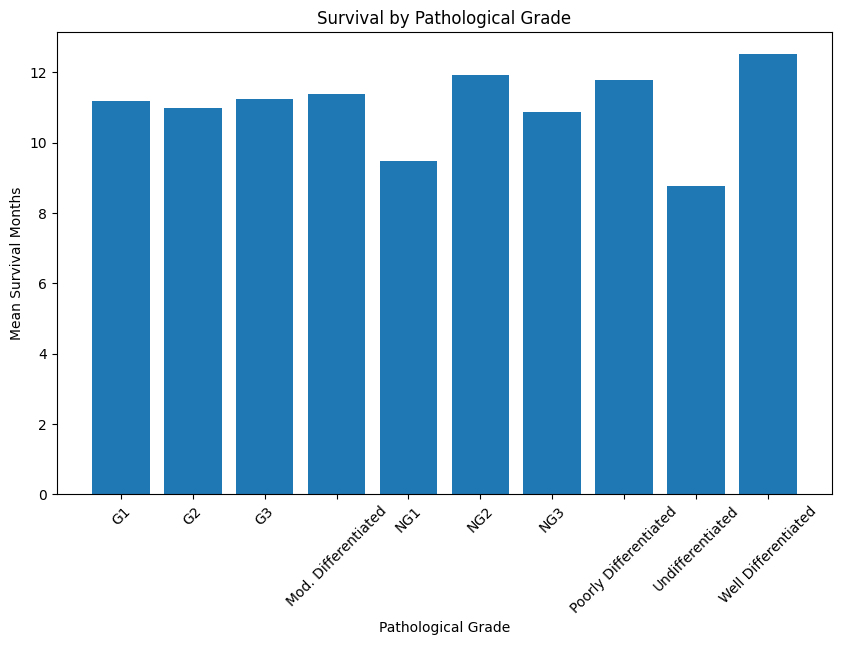

Median Survival Time for Early-Stage Breast Cancer Patients: 11.0 months
Median Survival Time for Late-Stage Breast Cancer Patients: 10.0 months


In [42]:
#remove unknown values
df2 = df[df['Pathological Grade'] != 'Unknown']

#create a new dataframe containing only the relevant columns
relevant_df = df2[['Alive', 'Pathological Grade', 'Survival months']]

# group the data by pathological grade and calculate the mean survival time for each group
grouped_df = relevant_df.groupby(['Pathological Grade']).mean()

# create a bar chart to compare the mean survival time for each pathological grade group
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(grouped_df.index, grouped_df['Survival months'])
ax.set_xlabel('Pathological Grade')
ax.set_ylabel('Mean Survival Months')
ax.set_title('Survival by Pathological Grade')
plt.xticks(rotation=45)
plt.show()

# calculate the median survival time for patients with early-stage (grades 1-2) and late-stage (grades 3-4) breast cancer
early_stage_median = relevant_df.loc[relevant_df['Pathological Grade'].isin(['G1', 'G2', 'G3', 'Well', 'Mod'])]['Survival months'].median()
late_stage_median = relevant_df.loc[relevant_df['Pathological Grade'].isin(['NG1', 'NG2', 'NG3', 'poor', 'Undifferentiated'])]['Survival months'].median()

# print the median survival times for each group
print('Median Survival Time for Early-Stage Breast Cancer Patients:', early_stage_median, 'months')
print('Median Survival Time for Late-Stage Breast Cancer Patients:', late_stage_median, 'months')

In [43]:
grouped_df

,Survival months
Pathological Grade,
G1,11.185471
G2,10.992887
G3,11.241358
Mod. Differentiated,11.376068
NG1,9.472222
NG2,11.929293
NG3,10.868571
Poorly Differentiated,11.771310
Undifferentiated,8.767442


In [44]:
df['Chemotherapy'].unique()

array(['No/Unknown', 'Yes'], dtype=object)

Median Survival Months for Patients who received chemotherapy: 75.0 months
Median Survival Months for Patients who did not receive chemotherapy: 68.0 months


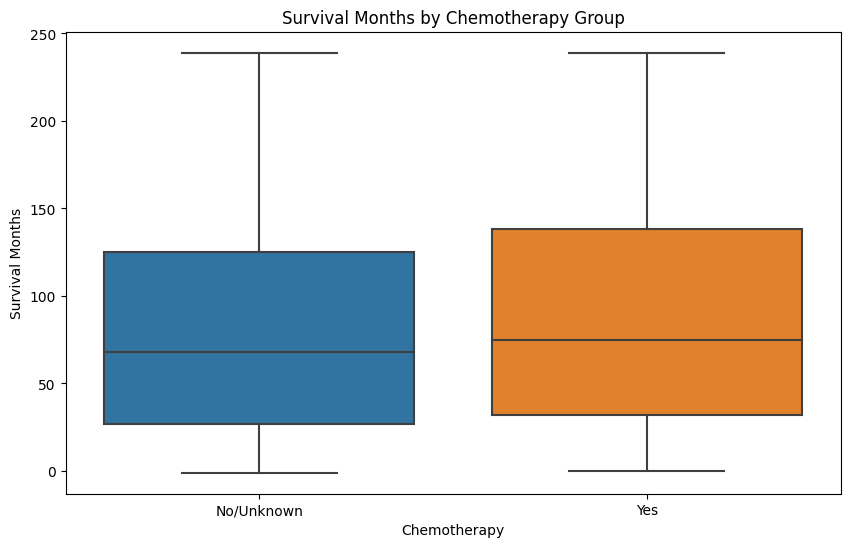

In [45]:
# Filter dataframe for patients who received chemotherapy and those who did not
chemo_group = df[df['Chemotherapy'] == 'Yes']
no_chemo_group = df[df['Chemotherapy'] == 'No/Unknown']

# Calculate median survival months for both groups
chemo_median_survival = chemo_group['Survival months'].median()
no_chemo_median_survival = no_chemo_group['Survival months'].median()

print(f'Median Survival Months for Patients who received chemotherapy: {chemo_median_survival:.1f} months')
print(f'Median Survival Months for Patients who did not receive chemotherapy: {no_chemo_median_survival:.1f} months')

# Create boxplots to compare survival months between the two groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='Chemotherapy', y='Survival months', data=df)
plt.title('Survival Months by Chemotherapy Group')
plt.xlabel('Chemotherapy')
plt.ylabel('Survival Months')
plt.show()

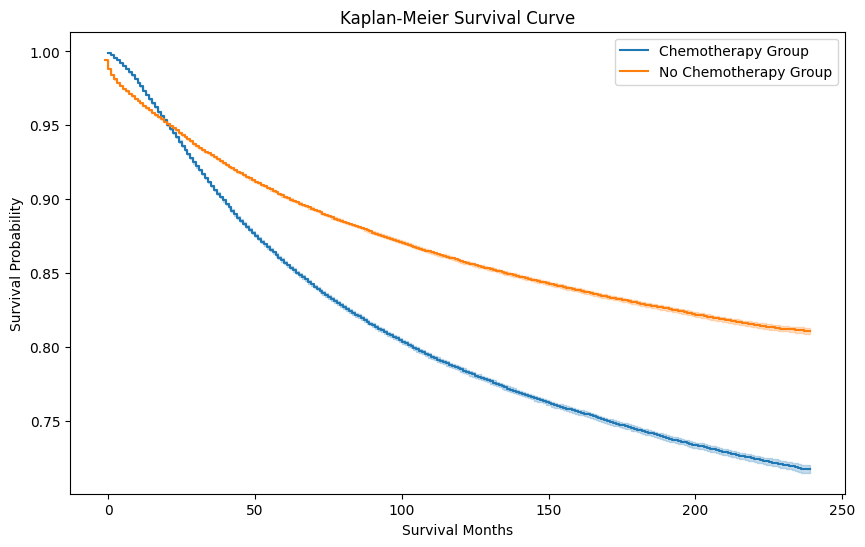

In [46]:
# Create a Kaplan-Meier curve to visualize the survival outcomes
kmf_chemo = KaplanMeierFitter()
kmf_no_chemo = KaplanMeierFitter()

kmf_chemo.fit(chemo_group['Survival months'], event_observed=chemo_group['Alive'] == 'Dead')
kmf_no_chemo.fit(no_chemo_group['Survival months'], event_observed=no_chemo_group['Alive'] == 'Dead')

plt.figure(figsize=(10, 6))
kmf_chemo.plot(label='Chemotherapy Group')
kmf_no_chemo.plot(label='No Chemotherapy Group')
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Survival Months')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

In [47]:
# Create a new column for the event, where 1 represents the event of death and 0 represents censoring
df['Event'] = df['Alive'].apply(lambda x: 0 if x == 'Alive' else 1)

# Convert categorical columns to numerical representations
label_encoder = LabelEncoder()

categorical_columns = ['Clinical Grade', 'Pathological Grade', 'Stage', 'EOD', 'Surgery', 'Radiation', 'Chemotherapy', 'COD']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

In [48]:
# Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(df[['Survival months', 'Pathological Grade', 'Event', 'Chemotherapy']], duration_col='Survival months', event_col='Event')

# Print the summary of the fitted model
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
Pathological Grade,0.171883,1.187539,0.003424,0.165172,0.178594,1.179596,1.195535,0.0,50.199603,0.0,inf
Chemotherapy,-0.318427,0.727292,0.003623,-0.325528,-0.311326,0.722146,0.732475,0.0,-87.890216,0.0,inf


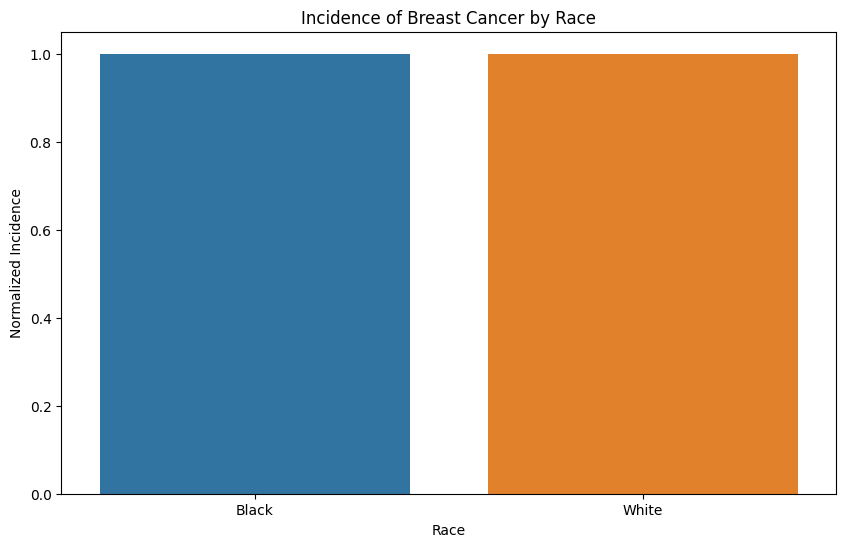

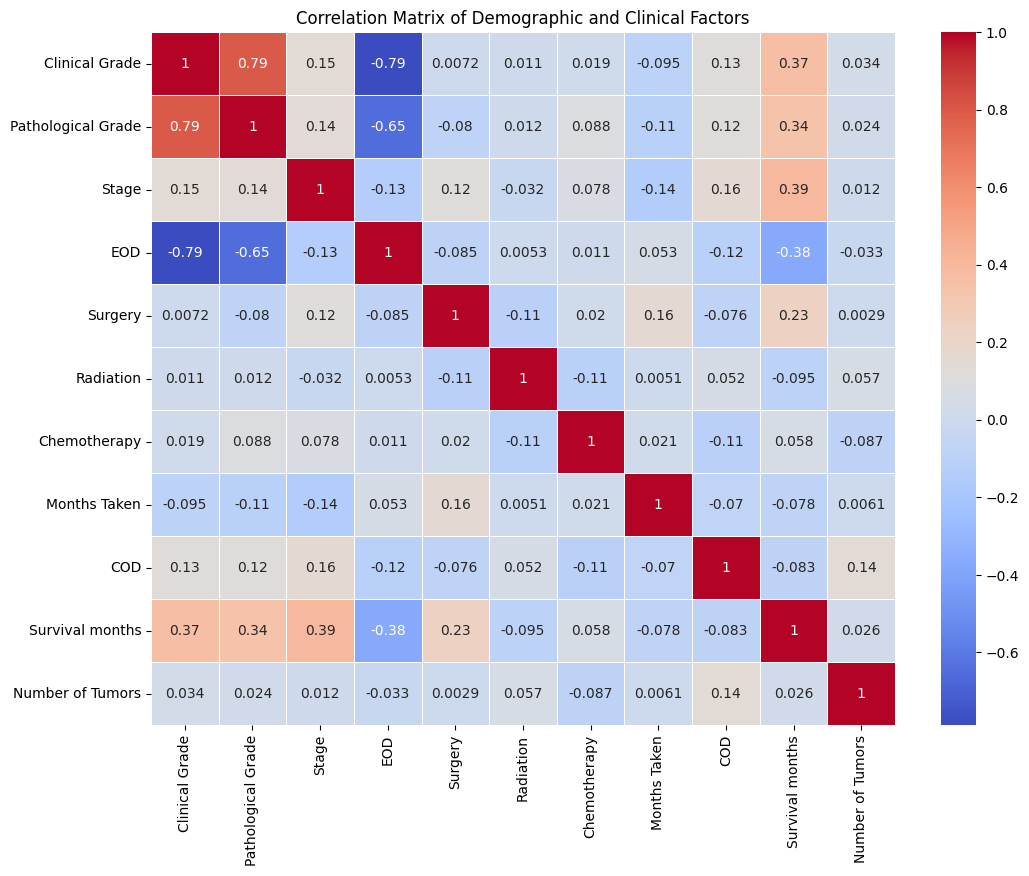

In [49]:
# Filter the data to only include Black and White patients
df = df[df['Race'].isin(['Black', 'White'])]


# Calculate the incidence of breast cancer for each race
incidence = df.groupby('Race')['Site'].count()

# Normalize the incidence values by the total number of patients in each race
incidence_normalized = incidence / df['Race'].value_counts()

# Create a bar plot of the normalized incidence values
plt.figure(figsize=(10, 6))
sns.barplot(x=incidence_normalized.index, y=incidence_normalized.values)
plt.title('Incidence of Breast Cancer by Race')
plt.xlabel('Race')
plt.ylabel('Normalized Incidence')
plt.show()

# Compute the correlation matrix while controlling for other demographic and clinical factors
columns_to_include = ['Age', 'Clinical Grade', 'Pathological Grade', 'Stage', 'EOD', 'Surgery', 'Radiation', 'Chemotherapy', 'Months Taken', 'COD', 'Survival months', 'Number of Tumors', 'Race']
correlation_matrix = df[columns_to_include].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Demographic and Clinical Factors')
plt.show()


In [50]:
correlation_matrix

,Clinical Grade,Pathological Grade,Stage,EOD,Surgery,Radiation,Chemotherapy,Months Taken,COD,Survival months,Number of Tumors
Clinical Grade,1.000000,0.792151,0.145837,-0.787664,0.007250,0.010972,0.019263,-0.094607,0.127096,0.366929,0.034184
Pathological Grade,0.792151,1.000000,0.140696,-0.651647,-0.080113,0.012321,0.087538,-0.112984,0.122392,0.338378,0.024347
Stage,0.145837,0.140696,1.000000,-0.132940,0.121057,-0.032460,0.077643,-0.140128,0.161987,0.392963,0.012272
EOD,-0.787664,-0.651647,-0.132940,1.000000,-0.084595,0.005330,0.010525,0.053230,-0.117267,-0.375009,-0.032669
Surgery,0.007250,-0.080113,0.121057,-0.084595,1.000000,-0.105811,0.019740,0.158495,-0.076311,0.225840,0.002866
Radiation,0.010972,0.012321,-0.032460,0.005330,-0.105811,1.000000,-0.110548,0.005050,0.052024,-0.094957,0.057490
Chemotherapy,0.019263,0.087538,0.077643,0.010525,0.019740,-0.110548,1.000000,0.020729,-0.109449,0.058140,-0.086917
Months Taken,-0.094607,-0.112984,-0.140128,0.053230,0.158495,0.005050,0.020729,1.000000,-0.070172,-0.078285,0.006099
COD,0.127096,0.122392,0.161987,-0.117267,-0.076311,0.052024,-0.109449,-0.070172,1.000000,-0.083297,0.143592
Survival months,0.366929,0.338378,0.392963,-0.375009,0.225840,-0.094957,0.058140,-0.078285,-0.083297,1.000000,0.025788


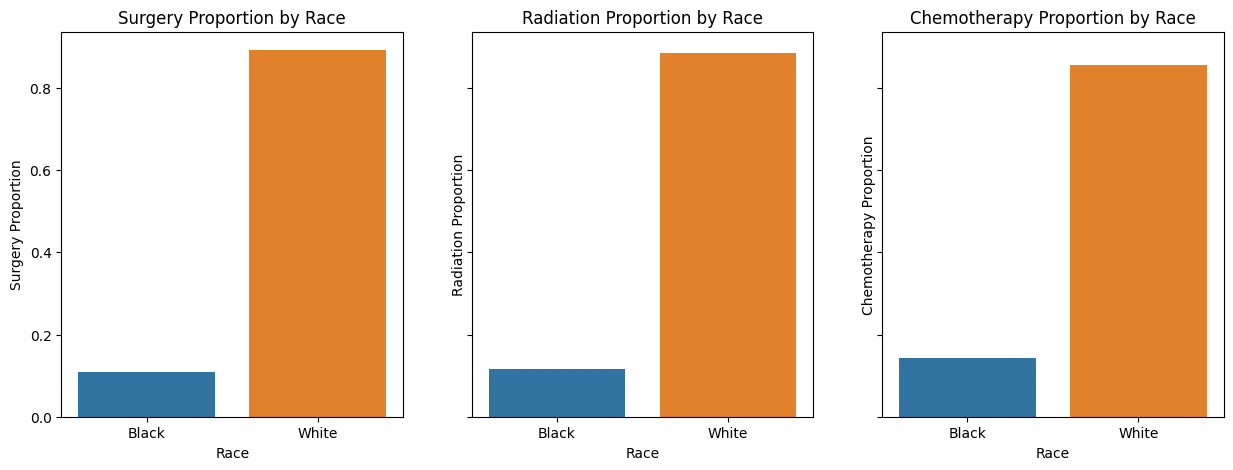

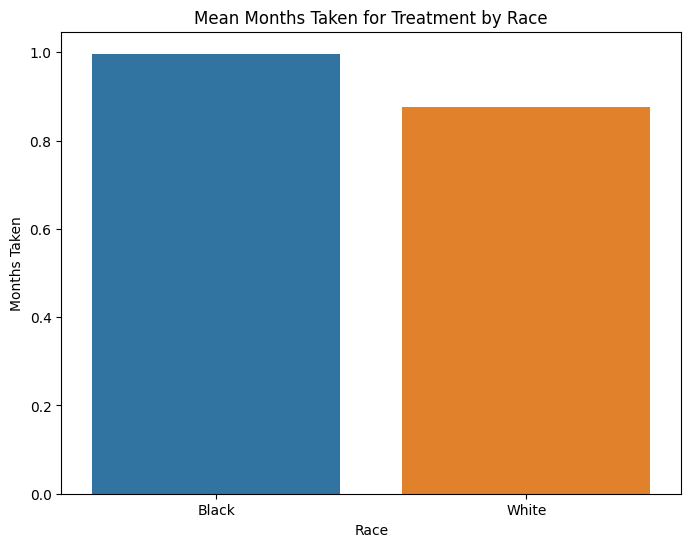

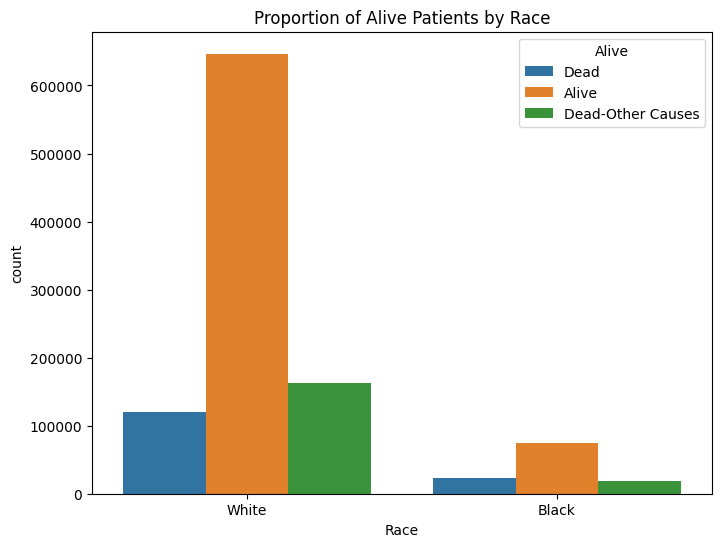

In [51]:
# Group data by Race
grouped_data = df.groupby('Race').agg({
    'Surgery': 'sum',
    'Radiation': 'sum',
    'Chemotherapy': 'sum',
    'Months Taken': 'mean',
    'Alive': lambda x: x.value_counts().index[0]
}).reset_index()

# Calculate the proportion of patients receiving each treatment by race
grouped_data['Surgery Proportion'] = grouped_data['Surgery'] / grouped_data['Surgery'].sum()
grouped_data['Radiation Proportion'] = grouped_data['Radiation'] / grouped_data['Radiation'].sum()
grouped_data['Chemotherapy Proportion'] = grouped_data['Chemotherapy'] / grouped_data['Chemotherapy'].sum()

# Plot the proportion of patients receiving each treatment by race
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.barplot(x='Race', y='Surgery Proportion', data=grouped_data, ax=axes[0])
axes[0].set_title('Surgery Proportion by Race')

sns.barplot(x='Race', y='Radiation Proportion', data=grouped_data, ax=axes[1])
axes[1].set_title('Radiation Proportion by Race')

sns.barplot(x='Race', y='Chemotherapy Proportion', data=grouped_data, ax=axes[2])
axes[2].set_title('Chemotherapy Proportion by Race')

plt.show()

# Plot mean months taken for treatment by race
plt.figure(figsize=(8, 6))
sns.barplot(x='Race', y='Months Taken', data=grouped_data)
plt.title('Mean Months Taken for Treatment by Race')
plt.show()

# Plot the proportion of alive patients by race
plt.figure(figsize=(8, 6))
sns.countplot(x='Race', hue='Alive', data=df)
plt.title('Proportion of Alive Patients by Race')
plt.show()


In [52]:
grouped_data

,Race,Surgery,Radiation,Chemotherapy,Months Taken,Alive,Surgery Proportion,Radiation Proportion,Chemotherapy Proportion
0,Black,633698,161732,56844,0.996590,Alive,0.107806,0.115899,0.143419
1,White,5244410,1233726,339505,0.875301,Alive,0.892194,0.884101,0.856581


In [53]:
# create a dictionary of old and new values for pathological grade
replace_dict = {'G1': 1, 'G2': 2, 'G3': 3, 'NG1':8, 'NG2':9, 'NG3':10, 'Well Differentiated': 4, 'Mod. Differentiated': 5, 'Poorly Differentiated':6, 'Undifferentiated':7, 'Unknown':11}

# replace the column values using the replace() method
df['Pathological Grade'] = df['Pathological Grade'].replace(replace_dict)

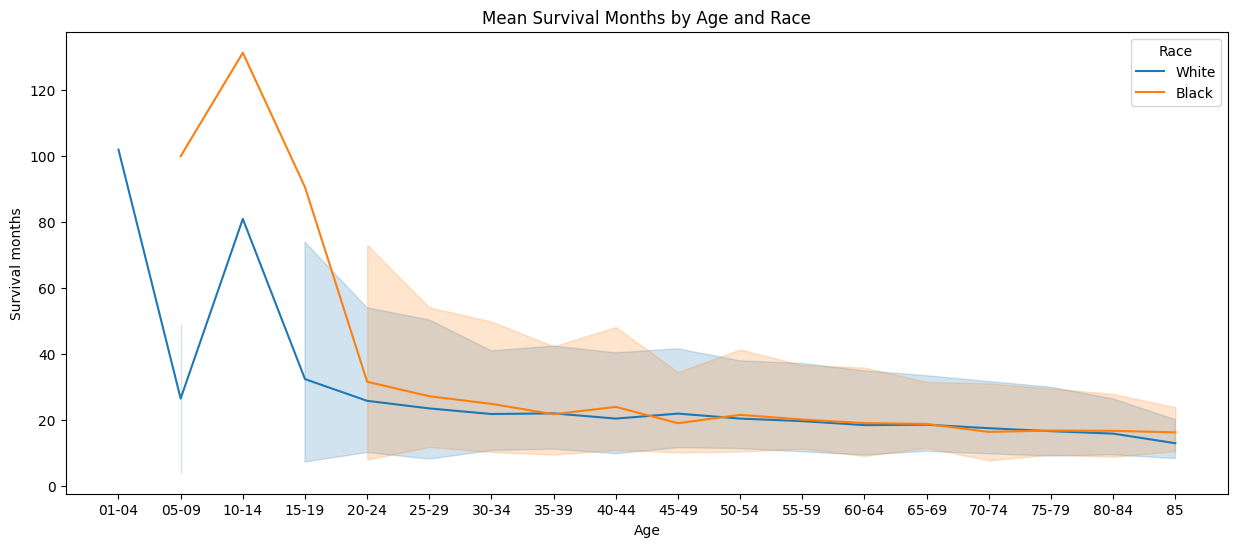

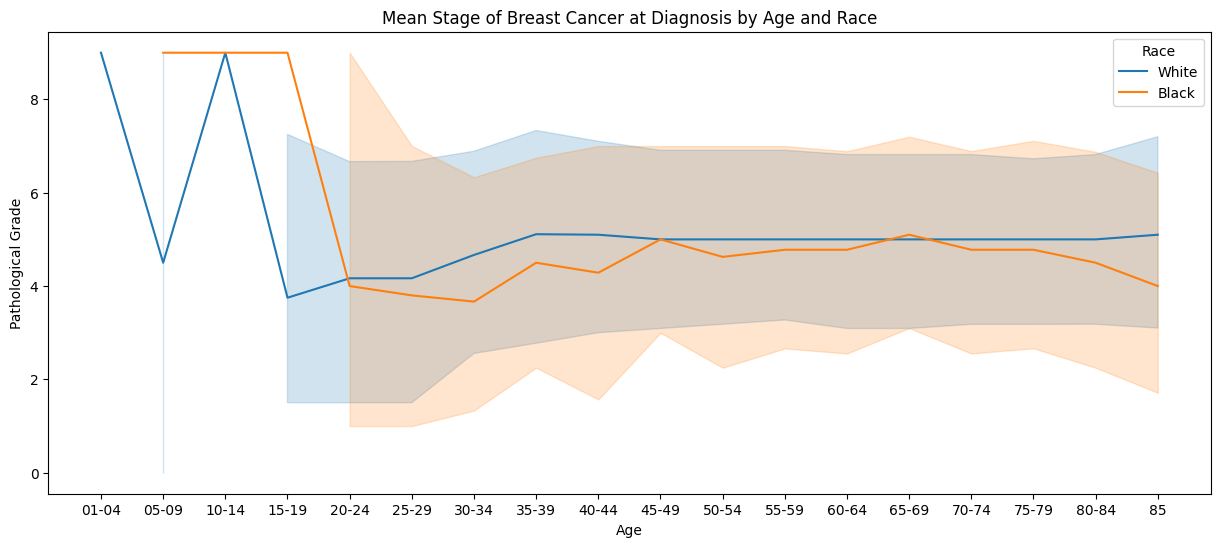

In [54]:
grouped_by_age_race = df.groupby(['Age', 'Race', 'Pathological Grade']).agg({
    'Survival months': 'mean',
}).reset_index()

# Plot the mean survival months by age and race
plt.figure(figsize=(15, 6))
sns.lineplot(x='Age', y='Survival months', hue='Race', data=grouped_by_age_race)
plt.title('Mean Survival Months by Age and Race')
plt.show()

# Plot the mean stage of breast cancer at diagnosis by age and race
plt.figure(figsize=(15, 6))
sns.lineplot(x='Age', y='Pathological Grade', hue='Race', data=grouped_by_age_race)
plt.title('Mean Stage of Breast Cancer at Diagnosis by Age and Race')
plt.show()



In [55]:
grouped_by_age_race

,Age,Race,Pathological Grade,Survival months
0,01-04,White,9,102.000000
1,05-09,Black,9,100.000000
2,05-09,White,0,4.000000
3,05-09,White,9,49.000000
4,10-14,Black,9,131.400000
...,...,...,...,...
253,85,White,6,4.666667
254,85,White,7,11.000000
255,85,White,8,8.250000
256,85,White,9,43.445223


# Model Building and Evaluation

In [56]:
df.head()

,Age,Sex,Year,Site,Clinical Grade,Pathological Grade,Diagnostic Confirmation,Histology,Stage,EOD,Surgery,Radiation,Chemotherapy,Months Taken,COD,Survival months,Number of Tumors,Race,Alive,Event
0,75-79,Female,2003,Axillary tail of breast,9,9,Positive histology,ductal and lobular neoplasms,4,0,6,2,0,0,12,14,3,White,Dead,1
1,70-74,Female,2018,Overlapping lesion of breast,9,2,Positive histology,ductal and lobular neoplasms,1,7,6,0,1,1,5,22,2,White,Alive,0
2,60-64,Female,2005,Central portion of breast,9,9,Positive histology,ductal and lobular neoplasms,2,0,6,2,0,0,12,81,2,White,Dead,1
3,70-74,Female,2005,"Breast, NOS",9,9,Positive histology,ductal and lobular neoplasms,2,0,6,2,0,2,6,7,2,White,Dead-Other Causes,1
4,40-44,Female,2001,Upper-outer quadrant of breast,9,9,Positive histology,ductal and lobular neoplasms,4,0,6,0,1,0,5,224,2,White,Alive,0


In [58]:
# Encode categorical variables
columns_to_encode = ['Age', 'Sex', 'Site', 'Diagnostic Confirmation', 'Histology', 'Race', 'Alive']

# Convert categorical columns to numerical representations
label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

In [59]:
#Split the dataset into one dependent variable (Survival months) and independent variables
X = df.drop(columns=['Survival months', 'Event'])
y = df['Survival months']

Linear Regression:
MAE: 24.177306152423974
MSE: 1289.429160274366
RMSE: 35.90862236670137
R²: 0.6909337148188128

Decision Tree:
MAE: 17.445943449468633
MSE: 1114.0676175353015
RMSE: 33.37765146823997
R²: 0.7329665323227015

Random Forest:
MAE: 15.195299426542752
MSE: 772.1685054261911
RMSE: 27.78792013494697
R²: 0.8149171285569485

Gradient Boosting:
MAE: 14.50202390318429
MSE: 678.2812733031662
RMSE: 26.043833690591065
R²: 0.8374211783738712



/var/folders/cg/72s387yj2x74yjnrdj3cwd980000gn/T/ipykernel_811/3008986407.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(model_names, rotation=45)
/var/folders/cg/72s387yj2x74yjnrdj3cwd980000gn/T/ipykernel_811/3008986407.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(model_names, rotation=45)
/var/folders/cg/72s387yj2x74yjnrdj3cwd980000gn/T/ipykernel_811/3008986407.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(model_names, rotation=45)
/var/folders/cg/72s387yj2x74yjnrdj3cwd980000gn/T/ipykernel_811/3008986407.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(model_names, rotation=45)


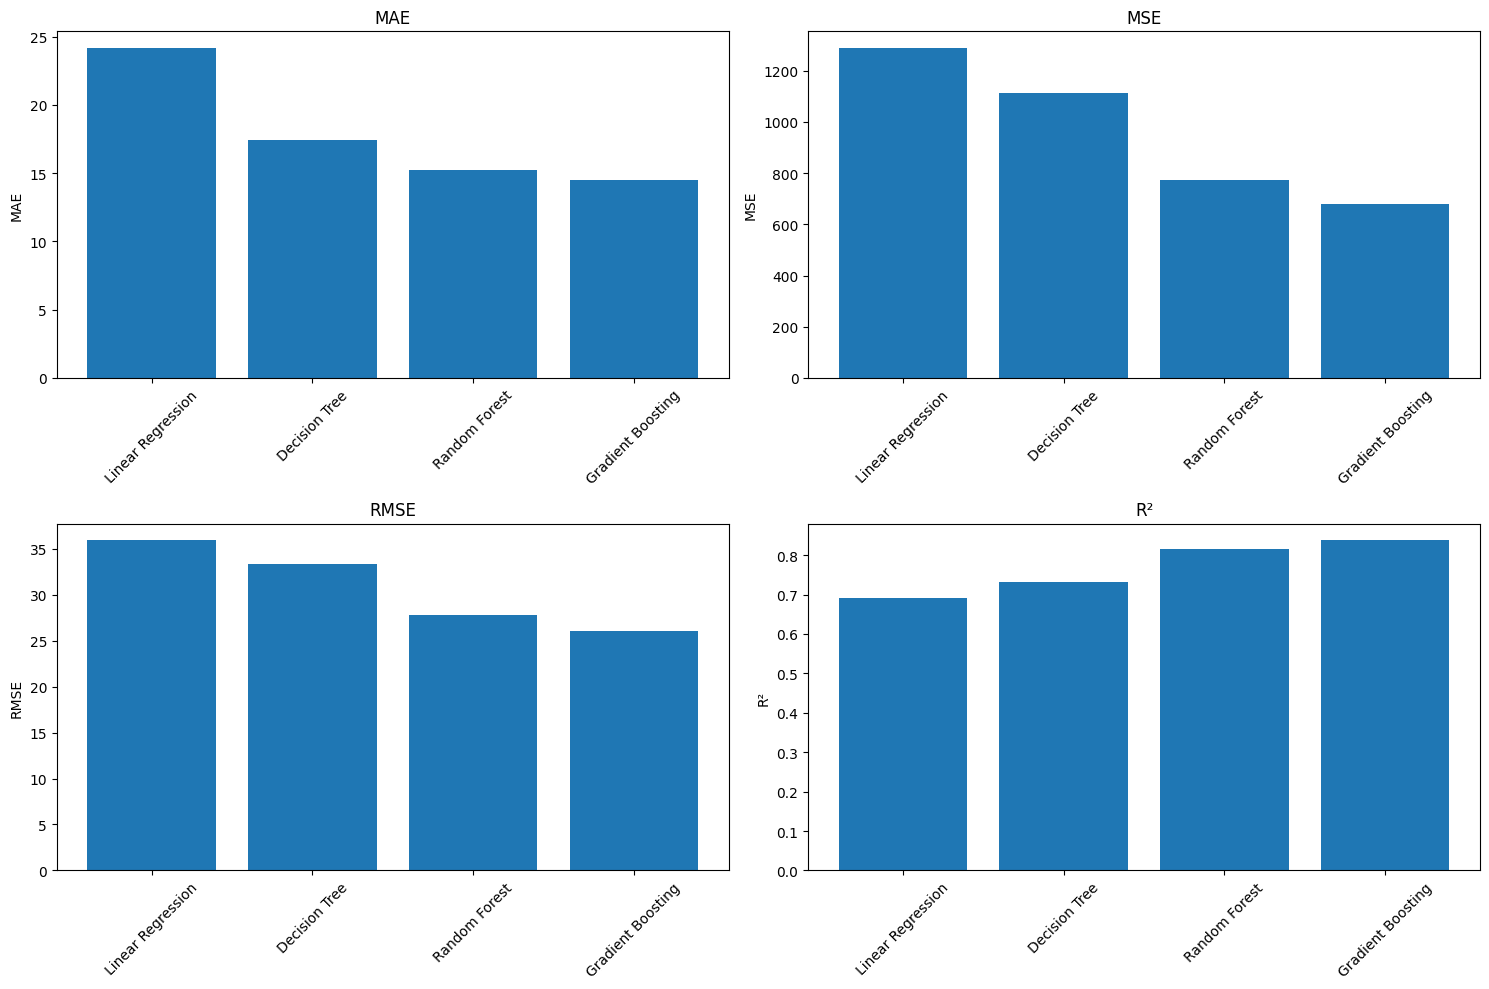

In [60]:
# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=116)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}

# Train and evaluate models
evaluation_metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'R²': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{name}:\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nR²: {r2}\n')
    
    evaluation_metrics['MAE'].append(mae)
    evaluation_metrics['MSE'].append(mse)
    evaluation_metrics['RMSE'].append(rmse)
    evaluation_metrics['R²'].append(r2)

# Plot comparison of evaluation metrics
n_models = len(models)
model_names = list(models.keys())

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.ravel()

for i, (metric, values) in enumerate(evaluation_metrics.items()):
    ax[i].bar(model_names, values)
    ax[i].set_title(metric)
    ax[i].set_ylabel(metric)
    ax[i].set_xticklabels(model_names, rotation=45)

plt.tight_layout()
plt.show()